## Prediction of Career Lengths of NBA Players

The dataset details the performance metrics of NBA players and whether their careers span more than 5 years or not. 

### Aim
The task is to predict whether the careers of these players will span for more than 5 years or less.


### Feature descriptions:
The dataset contains columns giving values for points attained by NBA players in their careers. The description of the features is as given below


|Features|Description|
|----|----|
|Name| Name of the Player|
|Games Played|Number of Games Played by the player|
|Minutes| Minutes Played
|Points| Points Per Game|
|Field Goals Made| Successful field goals made|
|Field Goals Attempted | Field goals attempted |
|Field Goals Percentage | Percentage of successful field goals out of the field goals attempted|
|3 Pointers Made| Successful 3 pointer attempts|
|3 Pointers Attempted | Total 3 pointers attempted|
|3 Pointers Percentage | Percentage of successful 3 pointers out of those attempted|
|Free Throws Made| Successful number of free throws | 
|Free Throws Attempted| Total attempted number of free throws|
|Free Throw Percentage| Successful number of free throws out of those attempted|
|OREB|Offesnisve Rebounds|
|DREB|Defensive Rebounds |
|REB|Rebounds|
|AST|Assists|
|STL|Steals|
|BLK|Number of blocks|
|TOV |Number of Turnovers|
|Play for more than 5 years or less| 1 if career length is greater than 5 years else 0 if career length is less than 5 years|

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split



from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)

### Read the data. List the categorical and continuous features in the dataset. Find the number of null values in every feature and impute them appropriately. 

In [2]:
# Read the data
df = pd.read_csv('NBA_players.csv')

In [3]:
df.head()

,Name,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV,Play for more than 5 years or less
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [7]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(exclude='object').columns.tolist()

In [8]:
categorical_features

['Name']

In [9]:
numerical_features

['Games Played',
 'Minutes',
 'Points',
 'Field Goals Made',
 'Field Goals Attempted',
 'Field Goals Percentage',
 '3 Pointers Made',
 '3 Pointers Attempted',
 '3 Pointers Percentage',
 'Free Throws Made',
 'Free Throws Attempted',
 'Fre Throw Percentage',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'Play for more than 5 years or less']

In [10]:
df.isnull().sum()

Name                                   0
Games Played                           0
Minutes                                0
Points                                 0
Field Goals Made                       0
Field Goals Attempted                  0
Field Goals Percentage                 0
3 Pointers Made                        0
3 Pointers Attempted                   0
3 Pointers Percentage                 11
Free Throws Made                       0
Free Throws Attempted                  0
Fre Throw Percentage                   0
OREB                                   0
DREB                                   0
REB                                    0
AST                                    0
STL                                    0
BLK                                    0
TOV                                    0
Play for more than 5 years or less     0
dtype: int64

In [12]:
df['3 Pointers Percentage'].fillna(0,inplace=True)

In [14]:
df.isnull().sum()

Name                                  0
Games Played                          0
Minutes                               0
Points                                0
Field Goals Made                      0
Field Goals Attempted                 0
Field Goals Percentage                0
3 Pointers Made                       0
3 Pointers Attempted                  0
3 Pointers Percentage                 0
Free Throws Made                      0
Free Throws Attempted                 0
Fre Throw Percentage                  0
OREB                                  0
DREB                                  0
REB                                   0
AST                                   0
STL                                   0
BLK                                   0
TOV                                   0
Play for more than 5 years or less    0
dtype: int64

In [15]:
df.drop(['Name'],1,inplace=True)

### Seperate the independent features and target

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Check for class distribution in the target

In [19]:
(y.value_counts()/y.shape[0])*100

1.0    62.014925
0.0    37.985075
Name: Play for more than 5 years or less, dtype: float64

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

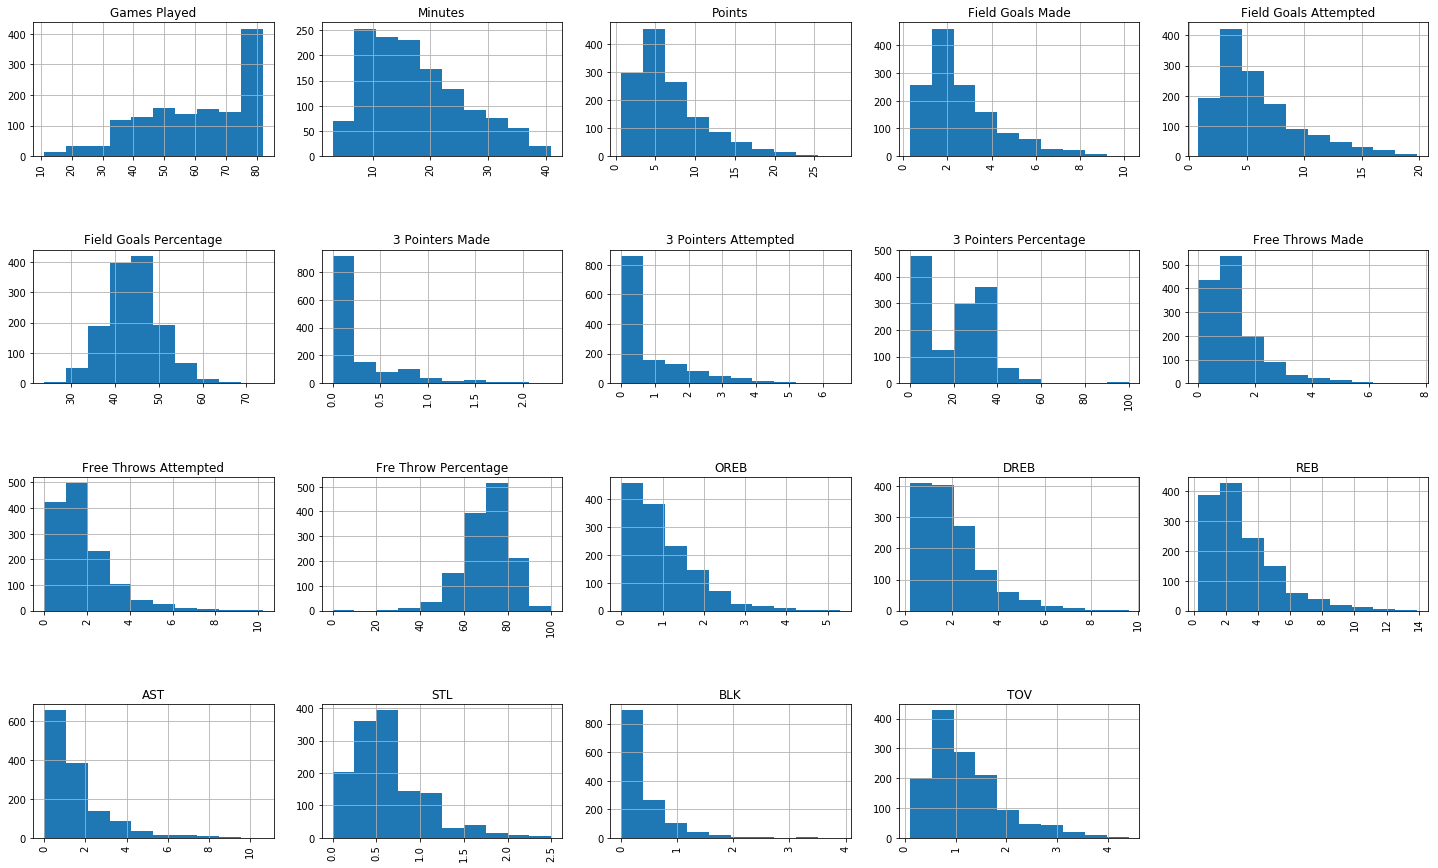

In [20]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(X.shape[1]) / cols)
for i, column in enumerate(X.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if  X.dtypes[column] == np.object:
        X[column].value_counts().plot(kind="bar", axes=ax)
    else:
        X[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

### Let's check the amount of skewness in our continuous predictors and depending on the type of skewness, let's apply the necessary transformations for removing the skewness

In [21]:
import scipy.stats as scs

features = []
skewness = []
for i in X.select_dtypes(include=np.number).columns:
    features.append(i)
    skewness.append(scs.skew(X[i]))
skewed = pd.DataFrame({'Features':features,'Skewness':skewness})

# If skewness is greater than 1 the feature is highly positively skewed
positively_skewed_variables = skewed[(skewed['Skewness']>1)]

# If the skewness is less than -1 the feature is highly negatively skewed.
negatively_skewed_variables = skewed[(skewed['Skewness']<-1)]


print('Positively Skewed Features \n',positively_skewed_variables)
print('*'*50)
print('Negatively Skewed Features \n',negatively_skewed_variables) 


# Let's remove the skewness in the positively skewed variables by using a log transform
for i in positively_skewed_variables['Features']:
    X[i] = np.log1p(X[i])

Positively Skewed Features 
                  Features  Skewness
2                  Points  1.386670
3        Field Goals Made  1.341041
4   Field Goals Attempted  1.294430
6         3 Pointers Made  2.030539
7    3 Pointers Attempted  1.810406
9        Free Throws Made  1.939825
10  Free Throws Attempted  1.842416
12                   OREB  1.437972
13                   DREB  1.487014
14                    REB  1.480077
15                    AST  2.130429
16                    STL  1.363271
17                    BLK  2.801012
18                    TOV  1.339239
**************************************************
Negatively Skewed Features 
 Empty DataFrame
Columns: [Features, Skewness]
Index: []


### Split train and test data into X_train ,y_train,X_test and y_test data and apply a vanilla logistic regression model

In [28]:
# Split into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
# Apply a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('The AUC_ROC_score for a logistic regression model is :' ,roc_auc_score(y_test,y_pred))
print('The accuracy for logistic regression is : ', accuracy_score(y_test,y_pred))

The AUC_ROC_score for a logistic regression model is : 0.6925422138836772
The accuracy for logistic regression is :  0.7313432835820896


### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy as well as the `roc_auc_score`.

- Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric i.e `roc_auc_score` on the test data. Use parameter `random_state = 42` for results reproducibility.

In [29]:
dt = DecisionTreeClassifier(random_state =42,max_depth=3)

# Fit the model on train data
dt.fit(X_train,y_train)

# accuracy
accuracy = dt.score(X_test,y_test)

# Predicted values for test data
y_pred_dt = dt.predict(X_test)

# ROC score
roc_score = roc_auc_score(y_test,y_pred_dt)
print('AUC_ROC_score is ',roc_score)
print('Accuracy score is ',accuracy_score(y_test,y_pred_dt))
print()
print(classification_report(y_test,y_pred_dt))

AUC_ROC_score is  0.5873983739837398
Accuracy score is  0.6442786069651741

              precision    recall  f1-score   support

         0.0       0.57      0.33      0.42       156
         1.0       0.67      0.84      0.74       246

   micro avg       0.64      0.64      0.64       402
   macro avg       0.62      0.59      0.58       402
weighted avg       0.63      0.64      0.62       402



### Next let's implement a Stacking Classifier consisting of one Decision Tree and Logistic regression and a  decision tree model as a meta classifier.

In [32]:
from mlxtend.classifier import StackingClassifier


classifier1 = DecisionTreeClassifier(random_state=0)
classifier2 = LogisticRegression(random_state=0)

classifier_list = [classifier1,classifier2]

m_classifier = DecisionTreeClassifier(random_state=0)


sclf = StackingClassifier(classifiers=classifier_list,meta_classifier=m_classifier)
sclf.fit(X_train,y_train)
s_score = sclf.score(X_test,y_test)


print("Test score: %.2f " % s_score)
print('AUC_ROC_score is ',roc_auc_score(y_test,y_pred))

Test score: 0.61 
AUC_ROC_score is  0.6925422138836772


###  Now let's apply a Random Forest model
- Let the parameters for the model be `criterion='gini'`, `max_depth= 6`,`max_features= 'auto'`,`n_estimators= 11`

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(criterion='gini', max_depth= 6,
max_features= 'auto',
n_estimators= 11)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_rf)

print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

AUC_ROC score is  0.6622889305816135
Accuracy is  0.7014925373134329
              precision    recall  f1-score   support

         0.0       0.66      0.49      0.56       156
         1.0       0.72      0.84      0.77       246

   micro avg       0.70      0.70      0.70       402
   macro avg       0.69      0.66      0.67       402
weighted avg       0.70      0.70      0.69       402



### Let's try improving upon the accuracy of the Random Forest using hyperparameter tuning

In [35]:
rfc = RandomForestClassifier()
param_grid = { 
'n_estimators': [11,12,13],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
}
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
grid_search_model.fit(X_train, y_train)

grid_search_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 13}

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(criterion='entropy', max_depth= 6,
max_features= 'auto',
n_estimators= 12)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_rf)

print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

AUC_ROC score is  0.6565040650406504
Accuracy is  0.6915422885572139
              precision    recall  f1-score   support

         0.0       0.63      0.50      0.56       156
         1.0       0.72      0.81      0.76       246

   micro avg       0.69      0.69      0.69       402
   macro avg       0.67      0.66      0.66       402
weighted avg       0.68      0.69      0.68       402



### Now let's apply a Voting Classifier that consists of three models - Logistic Regression, Decision Tree and a Random Forest with a soft voting

In [37]:
# Import libraries
from sklearn.ensemble import VotingClassifier

# Various models
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

# Code starts here
# Initialize voting classifier
voting_clf_hard = VotingClassifier(estimators=model_list,voting='soft')

# Fit the model on training data
voting_clf_hard.fit(X_train,y_train)

# predict on test
y_pred_vot = voting_clf_hard.predict(X_test)

# accuracy
hard_voting_score = voting_clf_hard.score(X_test,y_test)

print(roc_auc_score(y_test,y_pred_vot))
print(accuracy_score(y_test,y_pred_vot))
print(classification_report(y_test,y_pred_vot))

0.6260162601626016
0.654228855721393
              precision    recall  f1-score   support

         0.0       0.56      0.50      0.53       156
         1.0       0.70      0.75      0.73       246

   micro avg       0.65      0.65      0.65       402
   macro avg       0.63      0.63      0.63       402
weighted avg       0.65      0.65      0.65       402



### Let's check how a bagging classifier using a Decision Tree performs on our data

In [38]:
# Import Bagging Classifier
from sklearn.ensemble import BaggingClassifier

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), random_state=0,n_estimators=100,max_samples=100)

# Fit the model on training data
bagging_clf.fit(X_train,y_train)

# Predicted values of X_test
y_pred_bagging = bagging_clf.predict(X_test)

# accuracy 
print('Accuracy is ',bagging_clf.score(X_test,y_test))

# roc_score
score_bagging = roc_auc_score(y_test,y_pred_bagging)

print('AUC_ROC_score is ',score_bagging)
print(classification_report(y_test,y_pred_bagging))

Accuracy is  0.7288557213930348
AUC_ROC_score is  0.690509693558474
              precision    recall  f1-score   support

         0.0       0.70      0.52      0.60       156
         1.0       0.74      0.86      0.80       246

   micro avg       0.73      0.73      0.73       402
   macro avg       0.72      0.69      0.70       402
weighted avg       0.73      0.73      0.72       402



### Let's now visualize the AUC_ROC scores for all the models in one plot

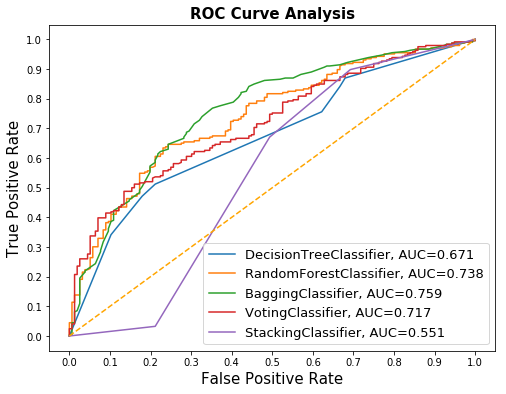

In [40]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [dt,rfc,bagging_clf,voting_clf_hard,sclf]

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()